## Initialize Library

In [22]:
import sounddevice as sd
import soundfile as sf
import pyaudio
import wave
import base64 
import requests
import json
import math
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys



## Open audio stream with PyAudio

In [23]:

CHUNK=1024
FORMAT=pyaudio.paInt16
CHANNELS=1
RATE=44100

p=pyaudio.PyAudio()


stream=p.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,frames_per_buffer=CHUNK,input_device_index=1)


print("Start Recording ")
frames=[]
seconds=7

for i in range(0,int(RATE/CHUNK*seconds)):
    data=stream.read(CHUNK)
    frames.append(data)



print("Recording Stopped...")



Start Recording 
Recording Stopped...


## Record audio for a specified duration and save it to a WAV file

In [24]:
stream.stop_stream()
stream.close()
p.terminate()

wf=wave.open("wavfile/output.wav",'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))

wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

## Printing Output As wave 

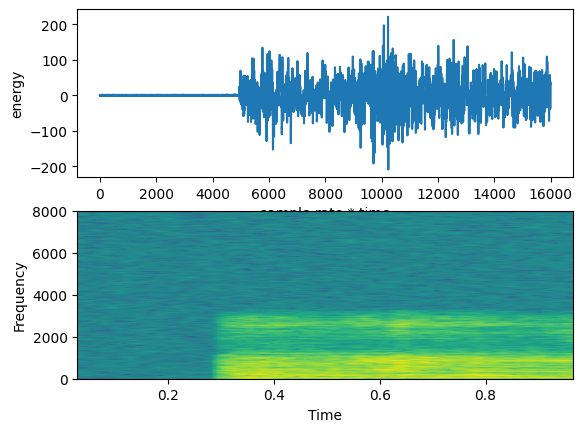

In [25]:
signal_wave = wave.open("wavfile/output.wav", "r")
sample_rate = 16000
sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)

sig = sig[:]

plt.figure(1)

plot_a = plt.subplot(211)
plot_a.plot(sig)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

plot_b = plt.subplot(212)
plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.show()

## Audio Output

In [26]:
ipd.Audio("wavfile/output.wav")

## Encode the WAV file using base64

In [27]:

url = "https://shazam.p.rapidapi.com/songs/v2/detect"

querystring = {"timezone":"America/Chicago","locale":"en-US"}

enc = base64.b64encode(open("wavfile/output.wav", "rb").read())
payload = enc

## Song Finding 

In [28]:
print("Searching for song......")

headers = {
	"content-type": "text/plain",
	"X-RapidAPI-Key": "da2e95620cmsh68155533232d077p169b20jsn9462fb6282f9",
	"X-RapidAPI-Host": "shazam.p.rapidapi.com"
}

response = requests.request("POST", url, data=payload, headers=headers, params=querystring)

res = json.loads(response.text)

print(res,end="\n\n")





Searching for song......
{'matches': [{'id': '636446692', 'offset': 114.940539062, 'timeskew': 0.0013486147, 'frequencyskew': 0.00036251545}], 'timestamp': 1682856620243, 'timezone': 'America/Chicago', 'tagid': '144afe4e-cec1-485b-80e9-fc1aab99ca45', 'track': {'layout': '5', 'type': 'MUSIC', 'key': '636446692', 'title': 'Maan Meri Jaan', 'subtitle': 'King', 'images': {'background': 'https://is3-ssl.mzstatic.com/image/thumb/Features115/v4/e4/fc/ae/e4fcae8b-8e3d-5718-7909-18106790e2b1/mzl.bjfhaket.jpg/800x800cc.jpg', 'coverart': 'https://is3-ssl.mzstatic.com/image/thumb/Music112/v4/90/9d/aa/909daa9a-3a47-9314-2855-39f5a157f1e3/5054197407734.jpg/400x400cc.jpg', 'coverarthq': 'https://is3-ssl.mzstatic.com/image/thumb/Music112/v4/90/9d/aa/909daa9a-3a47-9314-2855-39f5a157f1e3/5054197407734.jpg/400x400cc.jpg', 'joecolor': 'b:023120p:ffffffs:fceed0t:ccd5d2q:cac8ad'}, 'share': {'subject': 'Maan Meri Jaan - King', 'text': 'I used Shazam to discover Maan Meri Jaan by King.', 'href': 'https://www.

## Output the start time of the recognized song

In [29]:
offset=res['matches'][0]['offset']
print("Starttime : ",math.floor(offset),end="\n\n")

Starttime :  114



## YouTube URL for the song

In [30]:

uri = res['track']['sections'][2]['youtubeurl']['actions'][0]['uri']
print("Youtube Url : ",uri+'&t='+(str)(math.floor(offset)+7),end="\n\n")


Youtube Url :  https://youtu.be/ULcyLYD3o_M?autoplay=1&t=121

